<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision import transforms

try:
  from torchinfo import summary
except:
  print('[INFO] The library doesnt exits installing in')
  !pip install torchinfo -q
  from torchinfo import summary

[INFO] The library doesnt exits installing in


In [3]:
try:
  from going_modular import datasetup,engine
except:
  print('Getting the library for github of mr daniel')
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup,engine

Getting the library for github of mr daniel
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4356, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 4356 (delta 213), reused 255 (delta 177), pack-reused 4035 (from 1)
Receiving objects: 100% (4356/4356), 654.51 MiB | 21.73 MiB/s, done.
Resolving deltas: 100% (2584/2584), done.
Updating files: 100% (248/248), done.


In [4]:
 from going_modular.going_modular import data_setup,engine

In [5]:
from pathlib import Path
import requests
from zipfile import ZipFile

data_path = Path('data/')
image_dir = data_path/'piza_steak_sushi'

if image_dir.is_dir():
  print('The image directory already exists')
else:
  image_dir.mkdir(parents = True, exist_ok = True)

with open(data_path/'piza_steak_sushi.zip', 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with ZipFile(data_path/'piza_steak_sushi.zip','r') as zip_ref:
  print('unzipping the data files')
  zip_ref.extractall(image_dir)



unzipping the data files


Manual tanformers

In [6]:
manual_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [7]:
train_dir = image_dir/'train'
test_dir = image_dir/'test'

In [8]:
train_dataloader, test_dataloader, num_classes = data_setup.create_dataloaders(train_dir =train_dir,
                              test_dir = test_dir,
                              transform = manual_transforms,
                              batch_size = 32,

                            )

In [9]:
train_dataloader, test_dataloader, num_classes

(<torch.utils.data.dataloader.DataLoader at 0x7fce0da93a30>,
 ['pizza', 'steak', 'sushi'])

**Get the transfromer from the already trained model**

In [10]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [11]:
auto_transform = weights.transforms()
auto_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [12]:
train_dataloader, test_dataloader, num_classes = data_setup.create_dataloaders(train_dir = train_dir,
                                                                              test_dir = test_dir,
                                                                              transform = auto_transform,
                                                                              batch_size = 32)

In [13]:
train_dataloader, test_dataloader, num_classes

(<torch.utils.data.dataloader.DataLoader at 0x7fce0ce05150>,
 ['pizza', 'steak', 'sushi'])

In [14]:
weight = torchvision.models.EfficientNet_B0_Weights.DEFAULT

model = torchvision.models.efficientnet_b0(weights = weight)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 51.3MB/s]


In [15]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [16]:
from torchinfo import summary
summary(model,
        input_size = [1,3,224,224],
        col_names= ['input_size', 'output_size','num_params', 'trainable'],
        col_width = 20,
        row_settings = ['var_names'])


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [17]:
for params in model.features.parameters():
  params.requires_grad = False


In [18]:
summary(model,
        input_size = [1,3,224,224],
        col_names = ['input_size', 'output_size','num_params', 'trainable'],
        col_width = 15,
        row_settings= ['var_names'])

Layer (type (var_name))                                      Input Shape     Output Shape    Param #         Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224] [1, 1000]       --              Partial
├─Sequential (features)                                      [1, 3, 224, 224] [1, 1280, 7, 7] --              False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224] [1, 32, 112, 112] --              False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224] [1, 32, 112, 112] (864)           False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112] [1, 32, 112, 112] (64)            False
│    │    └─SiLU (2)                                         [1, 32, 112, 112] [1, 32, 112, 112] --              --
│    └─Sequential (1)                                        [1, 32, 112, 112] [1, 16, 112, 112] --              False
│    │    └─MBConv (0)                                   

In [19]:
import torch.nn as nn
model.classifier = nn.Sequential(
    nn.Dropout(p = 0.2,inplace = True),
    nn.Linear(1280,3))

In [20]:
summary(model,
        input_size = [1,3,224,224],
        col_names = ['input_size', 'output_size','num_params', 'trainable'],
        col_width = 15,
        row_settings= ['var_names'])

Layer (type (var_name))                                      Input Shape     Output Shape    Param #         Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224] [1, 3]          --              Partial
├─Sequential (features)                                      [1, 3, 224, 224] [1, 1280, 7, 7] --              False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224] [1, 32, 112, 112] --              False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224] [1, 32, 112, 112] (864)           False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112] [1, 32, 112, 112] (64)            False
│    │    └─SiLU (2)                                         [1, 32, 112, 112] [1, 32, 112, 112] --              --
│    └─Sequential (1)                                        [1, 32, 112, 112] [1, 16, 112, 112] --              False
│    │    └─MBConv (0)                                   

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [22]:
from going_modular.going_modular import engine

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [24]:
device

'cpu'

In [25]:
results = engine.train(model,
             train_dataloader,
             test_dataloader,
             optimizer,
             loss_fn,
             epochs = 5,
             device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1380 | train_acc: 0.2773 | test_loss: 0.8715 | test_acc: 0.7330
Epoch: 2 | train_loss: 0.9088 | train_acc: 0.6641 | test_loss: 0.7477 | test_acc: 0.8456
Epoch: 3 | train_loss: 0.8072 | train_acc: 0.7734 | test_loss: 0.6946 | test_acc: 0.8655
Epoch: 4 | train_loss: 0.7364 | train_acc: 0.7500 | test_loss: 0.5673 | test_acc: 0.8655
Epoch: 5 | train_loss: 0.6049 | train_acc: 0.8789 | test_loss: 0.5863 | test_acc: 0.8769


In [26]:
import requests
try:
  from helper_functions import plot_loss_curves
except:
  print('[INFO] The library is not available getting it from github')
with open('helper_functions.py','wb') as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  f.write(request.content)


[INFO] The library is not available getting it from github


In [27]:
from helper_functions import plot_loss_curves

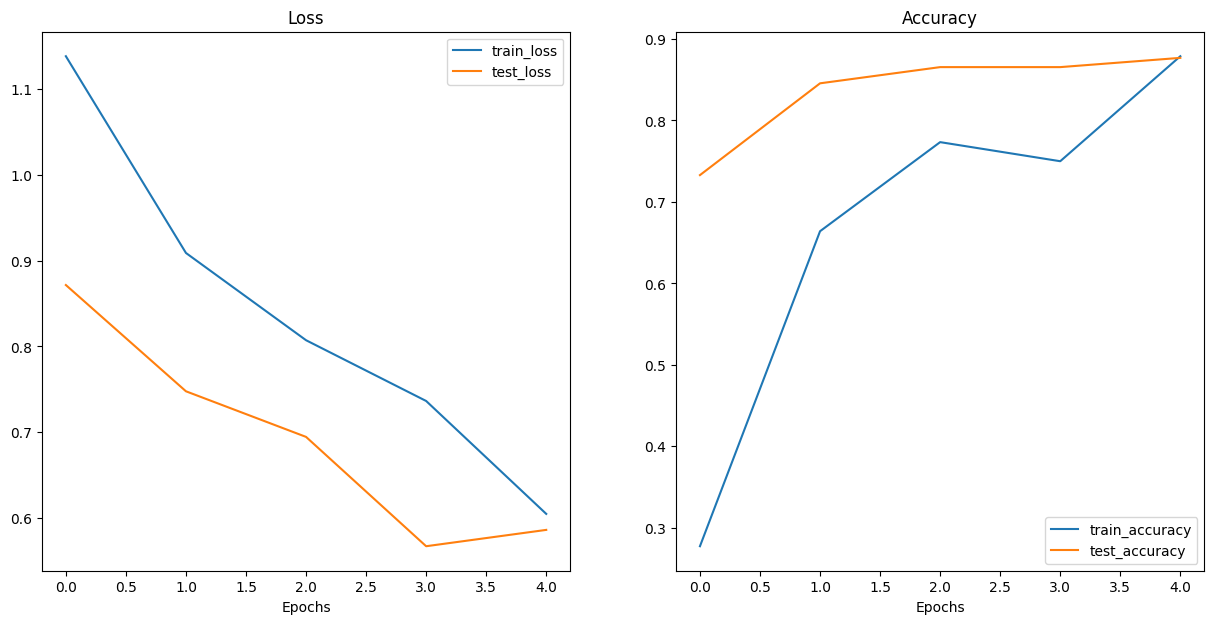

In [28]:
plot_loss_curves(results)

In [76]:
from typing import List
from PIL import Image
import matplotlib.pyplot as plt
def pred_and_plot_image(image_path: str,
                        model:torch.nn.Module,
                        class_names:List,
                        transform:torchvision.transforms= None):

  img = Image.open(image_path)
  print(img)
  if transform:
    transformed_image = transform(img)
  else:
    transform = torchvision.transforms.Compose([
        transforms.Resize((224,224)),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
        transforms.ToTensor()
        ])
    transformed_image = transform(img)
  if len(transformed_image.shape) < 4:
    transformed_image = transformed_image.unsqueeze(dim =0)

  model.eval()
  with torch.inference_mode():
    y_logit = model(transformed_image)
    y_pred = torch.argmax(torch.softmax(y_logit, dim = 1))
    probability = torch.max(torch.softmax(y_logit, dim =1))
    pred_class = class_names[y_pred]

  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.axis(False);
  plt.subplot(1,2,2)
  plt.imshow(transformed_image.squeeze().permute(1,2,0))
  plt.title(f'The predicted image is {pred_class} with probabillity of {probability}')
  plt.axis(False);






data/piza_steak_sushi/test/pizza/2003290.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x7FCD3734DCF0>


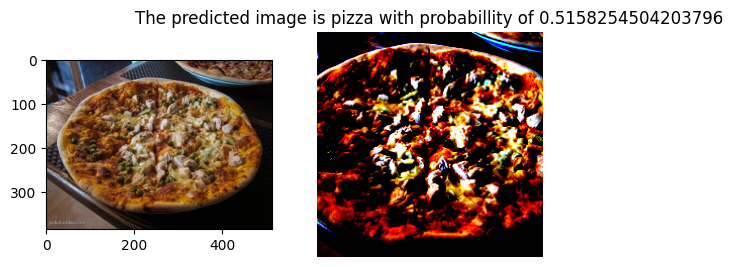

In [72]:
import random

test_images_path = list(Path('data/piza_steak_sushi/test').glob('*/*.jpg'))
testing_image = random.sample(population = test_images_path,
                              k = 1)
print(testing_image[0])
# Image.open(testing_image[0])
pred_and_plot_image(testing_image[0],model = model,class_names = num_classes, transform = auto_transform )

# Try working on the custom Pizza Dad image

In [74]:
import requests

with open('custom_pizza_image.jpeg','wb') as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3024x4032 at 0x7FCD34919C30>


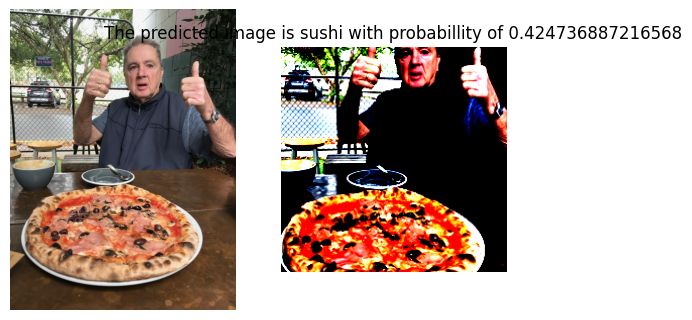

In [77]:
pred_and_plot_image('/content/custom_pizza_image.jpeg', model,num_classes, auto_transform)